# Thinkful Data Science Course

#Unit 3: Answering Questions with Data

##Lesson 3: Do Wealthier Countries Provide Better Education?

Let's scrape a web page for some data.

We're going to take a simple example. In this case, we're going to scrape school life expenctancy data for countries around the world. This is a measure of how long someone is likely to stay in school. The page we're querying comes from the Internet Archive. The current page is more sophisticated and allows users to download this data as an Excel file.

The first step is to inspect the page. Go to the link and check out the page with a web developer tool (in Chrome and Firefox, right click on the page and select "Inspect Element"). This will show you the HTML powering the page.

If you click through the tags, you'll notice a number of tables on the page. In the beginning of the web, tables were used to arrange elements on a page. More recently, webpage designers use other methods to arrange content, but some pages (like this one) still use tables to keep the content properly arranged.

To get the data we want, we need to extract the right table and get just the data in between the tags. In this case, we're going to use a package called BeautifulSoup and our old friend, Requests

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
import csv
import sqlite3 as lite

###Scrape Data from the UN

In [2]:
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"
r = requests.get(url)

Pass results to Beautiful Soup

In [20]:
soup = BeautifulSoup(r.content)

As the name implies, the webpage content exists as a mess of text in the soup object. We need to extract the table we want, so we start trying to filter through, checking each table for the content we want:

In [21]:
for row in soup('table'):
    print(row)

<table style="width:100%;"><tbody><tr>
<td id="wm-logo">
<a href="/web/" title="Wayback Machine home page"><img alt="Wayback Machine" border="0" height="39" src="/static/images/toolbar/wayback-toolbar-logo.png" width="110"/></a>
</td>
<td class="c">
<table style="margin:0 auto;"><tbody><tr>
<td class="u" colspan="2">
<form action="/web/form-submit.jsp" id="wmtb" method="get" name="wmtb" target="_top"><input id="wmtbURL" name="url" onfocus="this.focus();this.select();" style="width:400px;" type="text" value="http://unstats.un.org/unsd/demographic/products/socind/education.htm"/><input name="type" type="hidden" value="replay"/><input name="date" type="hidden" value="20110514112442"/><input type="submit" value="Go"/><span id="wm_tb_options" style="display:block;"></span></form>
</td>
<td class="n" rowspan="2">
<table><tbody>
<!-- NEXT/PREV MONTH NAV AND MONTH INDICATOR -->
<tr class="m">
<td class="b" nowrap="nowrap">
<a href="/web/20100819143645/http://unstats.un.org/unsd/demographic/pro

The directions say "finally, we see table 7 has the data we want". How do we know that? When I run the code (below), it gives me an error...

In [22]:
soup('table')[6]

<table border="0" cellpadding="0" cellspacing="0" width="800">
<tr valign="top">
<td><!-- #BeginEditable "MainContent" -->
<table align="center" border="0" width="540">
<tr>
<td cllcontsubhd="" colspan="2" valign="bottom"><h2 align="center"><a name="Top"></a>Social 
              indicators </h2></td>
</tr>
<tr>
<td cllcontsubhd="" colspan="2" height="23" valign="top"><div align="center" class="csubhd"><a href="default.htm">Introduction</a> 
              | <a href="statistics.htm">Statistics</a></div></td>
</tr>
</table>
<table cellpadding="0" cellspacing="0">
<tr>
<td height="1" width="797"><div align="right">
<p class="Clear"><a href="Education_Dec2010.xls" style="color: #666; font-weight: bold">Download data</a> <a href="Education_Dec2010.xls"><img alt="Excel" border="0" height="21" name="Excel" src="/web/20110514112442im_/http://unstats.un.org/unsd/img/excel.gif" width="22"/></a></p>
<div align="left">
<table align="left" cellpadding="0" cellspacing="0">
<tr class="bar1">
<td cols

Now we want to return all the tags. Look through the documentation and see if you can get the elements from the table. You'll still need to process the rows once you retrieve them and deal with the spaces and empty field separators. Do your best and reach out to your mentor if you need help.

In [23]:
A = soup('table')[6].findAll('tr', {'class': 'tcont'})
B = [x for x in A if len(x)== 25] # removing records without value

###Storing the Data

Create a table with the country name, the male school life expectancy, the female school life expectancy and the year of the analysis. Create it in Python as we've done in previous examples and insert the data you've scraped. If you have any troubles, ask your mentor for assistance, but hopefully these tasks are becoming more and more familiar to you.

In [24]:
records = []
for rows in B:
    col = rows.findAll('td')
    country = col[0].string
    year = col[1].string
    total = col[4].string
    men = col[7].string
    women = col[10].string
    record = (country, year, total, men, women)
    records.append(record)
    column_name = ['country', 'year', 'total', 'men', 'women']
    table = pd.DataFrame(records, columns = column_name )

In [25]:
records

[('Afghanistan', '2004', '8', '11', '5'),
 ('Albania', '2004', '11', '11', '11'),
 ('Algeria', '2005', '13', '13', '13'),
 ('Andorra', '2008', '11', '11', '12'),
 ('Anguilla', '2008', '11', '11', '11'),
 ('Austria', '2008', '15', '15', '15'),
 ('Azerbaijan', '2008', '13', '13', '13'),
 ('Bahrain', '2006', '14', '14', '15'),
 ('Bangladesh', '2007', '8', '8', '8'),
 ('Belarus', '2007', '15', '14', '15'),
 ('Bolivia (Plurinational State of)', '2007', '14', '14', '14'),
 ('Bosnia and Herzegovina', '2009', '14', '13', '14'),
 ('Botswana', '2006', '12', '12', '12'),
 ('Brazil', '2008', '14', '14', '14'),
 ('British Virgin Islands', '2005', '17', '15', '19'),
 ('Cameroon', '2009', '10', '11', '9'),
 ('Canada', '2002', '16', '16', '16'),
 ('Cape Verde', '2009', '12', '11', '12'),
 ('Cayman Islands', '2008', '12', '11', '12'),
 ('Central African Republic', '2009', '7', '8', '5'),
 ('Colombia', '2009', '14', '13', '14'),
 ('Comoros', '2004', '11', '12', '10'),
 ('Congo', '2003', '9', '10', '8'),

###Profiling the Data

As we have with the previous assignments, look at the distribution of values for each attribute.

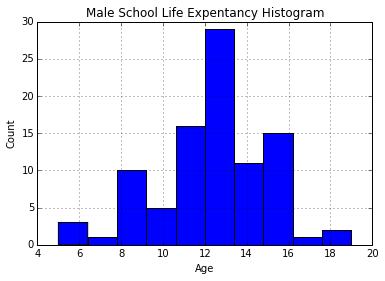

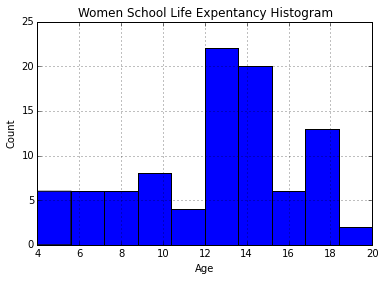

In [26]:
plt.figure()
(table['men'].astype(int)).hist()
plt.title('Male School Life Expentancy Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram of female ages
plt.close()
plt.figure()
(table['women'].astype(int)).hist()
plt.title('Women School Life Expentancy Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#####Anything in particular stand out at you? 

The male ages are distributed more normally, while with females there is a distinct peak at ages 12-15.

####What's the median age and the mean age for each gender? 

In [28]:
# Mean age men
print('The mean age for men is ',(table['men'].astype(int)).mean())

# Median age men
print('The median age for men is ',median(table['men'].astype(int)))

# Mean age women
print('The mean age for women is ',(table['women'].astype(int)).mean())

# Median age women
print('The median age for women is ',median(table['women'].astype(int)))


The mean age for men is  12.258064516129032
The median age for men is  12
The mean age for women is  12.451612903225806
The median age for women is  13


####Which do you think is more appropriate for this dataset?

I think the median is more appropriate

###Comparing GDP to Educational Attainment

You're going to compare the school life expectancy statistics you scraped in the previous assignment to national gross domestic product data from the World Bank.

First, connect to new database

In [3]:
con = lite.connect('education.db')
cur = con.cursor()

Create table

In [9]:
with con:
    cur.execute("DROP TABLE IF EXISTS gdp")
    cur.execute('CREATE TABLE gdp (country_name REAL, _1999 INT, _2000 INT, _2001 INT, _2002 INT, _2003 INT, _2004 INT, _2005 INT, _2006 INT, _2007 INT, _2008 INT, _2009 INT, _2010 INT);') 

Notice the years in the file we scraped only run from 1999 to 2010, so that's all the data we need from the GDP file. With a file like this, it's best to read in the file line by line using the technique you were introduced to in the very beginning of the course:

The values have double quotation marks around them, so to clean them up, the csv module is necessary. The data is cleaned and we just need to format the string. If the cur.execute() statement doesn't make sense, put it into iPython and run it with a print statement instead. The idea is that we're creating a query string just as if we typed it all out, but with functions in Python.

In [10]:
with open('ny.gdp.mktp.cd_Indicator_en_csv_v2/ny.gdp.mktp.cd_Indicator_en_csv_v2.csv','rU') as inputFile:
    next(inputFile) # skip the first two lines
    next(inputFile)
    header = next(inputFile)
    inputReader = csv.reader(inputFile)
    for line in inputReader:
        with con:
            cur.execute('INSERT INTO gdp (country_name, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010) VALUES ("' + line[0] + '","' + '","'.join(line[42:-5]) + '");')


IndexError: list index out of range

So now you have the GDP for the countries and the school life expectancy, try and match them up. See if there is any correlation between the GDP numbers and the life expectancy. You may need to do a log-transform of the GDP to get a scale you can use to compare the widely distributed countries. If there's a correlation, why do you think that is? Also explain why there may not be a correlation. Write up a blogpost and share your insights with the world!